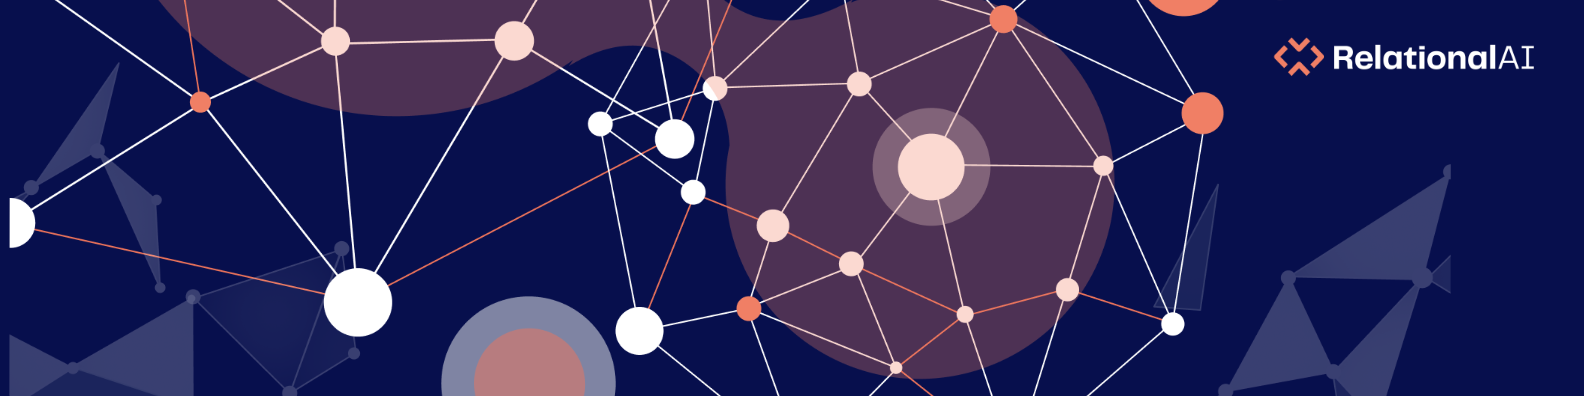

# Betweenness Centrality

Betweenness centrality is a measure used in network analysis to identify nodes that act as bridges or mediators between different parts of a network. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes in the network.

For a meaningful demonstration, let's create a hypothetical scenario where we have a social network representing friendships between individuals. We'll use the Betweenness Centrality algorithm to identify key individuals who serve as a connection between different social groups within the network.

First, we need to import the `relationalai` library and define our model, which we call `MyBCGraph`. We also create a type called `Person`.

In [ ]:
%pip install relationalai

In [2]:
import relationalai as rai
from relationalai.std.graphs import Graph
from relationalai.std import aggregates
import colorsys

model = rai.Model("MyBCGraph")
Person = model.Type("Person")

## Let's add some data to our model
Let's create a simple social network graph representing friendships between individuals. Using a RelationalAI **rule**, we're going to populate the model with the data from the `friendship` list we define. `Person.add` adds a new object of the `Person` type to the model, with a `name` property.

We also set `friends` property as a link between every pair of people from the `friendship` list.

In [3]:
friendships = [
    ('Alice', 'Bob'),
    ('Alice', 'Charlie'),
    ('Bob', 'Charlie'),
    ('Charlie', 'David'),
    ('David', 'Eve'),
    ('Eve', 'Frank'),
    ('Alice', 'David'),
    ('Bob', 'Eve'),
    ('Charlie', 'Frank'),
    ('David', 'George'),
    ('Eve', 'Hannah'),
    ('Frank', 'Isabella'),
    ('George', 'Jack'),
    ('Hannah', 'Kevin'),
    ('Isabella', 'Liam'),
]

with model.rule(dynamic = True):
    for (person_name, friend_name) in friendships:
        person = Person.add(name = person_name)
        person.friends.add(Person.add(name = friend_name))

## Creating the Graph
Let's start by creating a `graph` with nodes and edges. We add all `Person`  instances to `Node` type, and assign the `label` property so that we can visualize it later in the graph. We then add the `friends` property to `Edge` type. 

In [4]:
# Create graph
graph = Graph(model, undirected = True)
Node, Edge = graph.Node, graph.Edge

# add all Person instances as Nodes, assign `name` property (for displaying)
Node.extend(Person, label = Person.name)

# add all `friends` properties as Edges
Edge.extend(Person.friends)

##  Running the algorithm
To compute the betweenness centrality of each node in the graph, we use the `betweenness_centrality` function. We define a **rule**, that runs the algorithms and then adds the betweenness centrality score to each `Person` as a property of the node.

In [5]:
with model.rule():
    person = Person()
    person_node = Node(person)
    centrality = graph.compute.betweenness_centrality(person_node)
    person_node.set(centrality = centrality)

## Visualizing the results

We can visualize the graph using the `visualize` function on the graph object. We set the node size and color to be the centrality score from the previous step.

In [6]:
def get_gradient_color(value):
    rgb = colorsys.hsv_to_rgb(1, value * 0.03, 1) # Adjust the value multiplier to control the gradient range
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

graph.visualize(three = False, style = {
    "node": {
        "color": lambda n: get_gradient_color(n['centrality']),
        "size": lambda n: 20 + n['centrality'],
    },
    "edge": {
        "color": "green",
    }
}).display(inline = True)

> **Tip**. We can see that the nodes with the highest betweenness centrality scores are the ones that act as bridges between different social groups in the network.

## Querying the graph
We can also query the graph to get all the nodes and their betweenness centrality scores. This is done using `model.query()` context and `graph.Node()` or `graph.Edge()` types.

In [7]:
with model.query() as select:
    person = Person()
    node = Node(person)
    response = select(person.name, node.centrality)

response

### Let's find out who has the highest score
We can add a filter to the query to get the node with the highest betweenness centrality score. In this case, we use the `top` function from the `aggregates` module.

In [8]:
with model.query() as select:
    person = Person()
    node = Node(person)
    aggregates.top(1, node.centrality)
    response = select(person.name, node.centrality)

response